In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [185]:
data=pd.read_csv('Fraud_check.csv')

In [186]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [187]:
# i used lambda fuction to add target column 
data['score']=data['Taxable.Income'].apply(lambda x:'Good' if x>=30000 else 'Risky' )

In [188]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,score
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [189]:
# checkd for is there any na values
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
score              0
dtype: int64

In [190]:
# check there datatypes
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
score              object
dtype: object

In [191]:
# checked there shape
data.shape

(600, 7)

<AxesSubplot:>

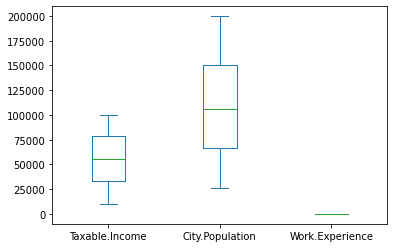

In [192]:
# checked for outliers
data.plot(kind='box')

In [193]:
# cheked for duplicates values
data.duplicated().sum()

0

In [194]:
# we check our target is biased or not
data['score'].value_counts()

Good     476
Risky    124
Name: score, dtype: int64

In [195]:
# first we split data into x and y 
from sklearn.preprocessing import LabelEncoder

In [196]:
# convert target string to numeric
l_e=LabelEncoder()
data['score']=l_e.fit_transform(data.iloc[:,-1])

In [197]:
# the we use get dummies to convert categorical features into numeric
x=pd.get_dummies(data.iloc[:,0:6])
y=data.iloc[:,-1]

In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
scaler=StandardScaler()
scaled=scaler.fit_transform(x)

In [200]:
from sklearn.decomposition import PCA

In [201]:
# We cant use PCA in this dataset cos we used one hot encoder and get 0 and 1 values for categorical data so pca only 
# understand numerical data and ignores 0 and 1 so we should not use pca i didint know the pca rules thats why i used 
# used pca for redusing the features and getting varinace in few columns
# pca=PCA(n_components=6)
# pc=pca.fit_transform(scaled)
# x=pc

In [202]:
# val=pca.explained_variance_ratio_
# val

In [203]:
# pca.components_

In [204]:
from sklearn.model_selection import train_test_split

In [237]:
x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.33,random_state=42)

In [238]:
# checked if the target is imbalanced or not
y_train.value_counts()

0    319
1     83
Name: score, dtype: int64

In [239]:
# now we use smote method to balance the imbalance target

In [240]:
from imblearn.over_sampling import SMOTE

In [249]:
s_m=SMOTE(random_state=42)
x_train,y_train=s_m.fit_resample(x_train,y_train)

In [250]:
y_train.value_counts()

1    319
0    319
Name: score, dtype: int64

In [251]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,r2_score,accuracy_score

In [260]:
# now target is balance no we use decision tree classifier
d_t=DecisionTreeClassifier(max_depth=2,random_state=0,splitter='random')
model=d_t.fit(x_train,y_train)

In [261]:
# checked the score of model
model.score(x_train,y_train)

0.9388714733542319

In [262]:
# then we predict test data
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.898989898989899

In [263]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       137
           1       1.00      0.67      0.80        61

    accuracy                           0.90       198
   macro avg       0.94      0.84      0.87       198
weighted avg       0.91      0.90      0.89       198



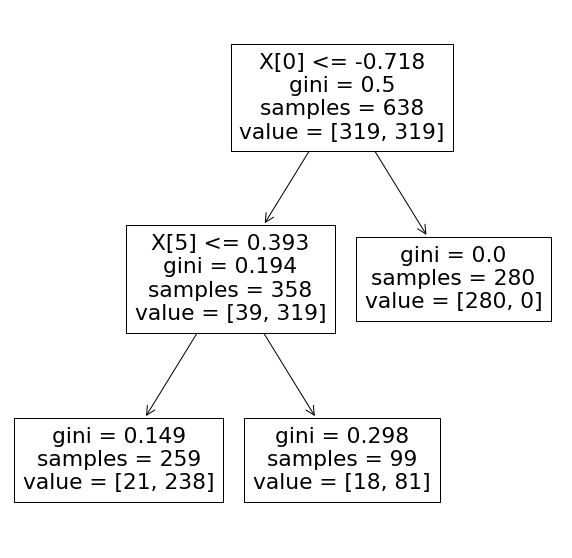

In [264]:
fig=plt.figure(figsize=(10,10))
tree.plot_tree(model)
plt.show()